# Metodo della Massima verosimiglianza per i dati della stazione di Pian di Fedaia (diga)

### Questo metodo consiste nel valutare la probabilità di ottenere la stessa serie temporale registrata partendo da una funzione e dei parametri assegnati.

In [1]:
import os
import math
from pandas import *
import pandas as pd
from datetime import datetime
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import genextreme,gumbel_r
from numpy import linspace
from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
os_DatiFedaia=os.getcwd()
os.chdir(os_DatiFedaia)

In [3]:
data=pd.read_csv('DatiFedaia.csv')

In [4]:
map(datetime,data['Anno'])
data=data.set_index('Anno')

#### Si crea una lista che contiene gli intervalli temporali

In [5]:
lst=['1h','3h','6h','12h','24h']

### Stima dei parametri
#### con la funzione di densità di probabilità di Gumbel

In [6]:
param=[]
for i in lst: 
    param.append(gumbel_r.fit(data[i].dropna())) #fit=stima dei parametri per dati generici

#### Si crea un dataframe contenente i parametri

In [7]:
abs_mle=pd.DataFrame(param, columns=["a","b"], index=lst).T

In [8]:
abs_mle.to_pickle("abs_mle")
abs_mle

,1h,3h,6h,12h,24h
a,13.001634,22.728162,31.960715,48.139302,66.168039
b,3.646094,5.338338,9.341875,16.063882,24.067697


#### Si cercano i valori di precipitazione massima e minima registrati per individuare l'intervallo di valori su cui graficare i risultati

##### Qui è stato alzato il limite massimo per comprendere nel grafico l'asintoto che tende a uno

In [9]:
minimo=min(data.min()) #7.6

mass=max(data.max()) #132.6

t_rain=np.linspace(0,170,100) #è stato alzato il limite massimo per poter osservare la funzione tendere a 1

#### Si definisce la funzione della curva di Gumbel

In [10]:
def gumbel(x,abs_d,col):
    return np.exp(-np.exp(-(x-abs_d[col]["a"])/abs_d[col]["b"]))

#### Si impostano i grafici

In [11]:
import random
colors={}
for i in lst:
    colore=(random.random(), random.random(), random.random())
    colors.update({i:colore})

In [12]:
SMALL_SIZE=15
MEDIUM_SIZE=20
BIGGER_SIZE=30
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [13]:
g=[]
for i in lst:
    g.append(gumbel(t_rain,abs_mle,i))
gb=pd.DataFrame(g).T
gb.index=t_rain
gb.columns=lst

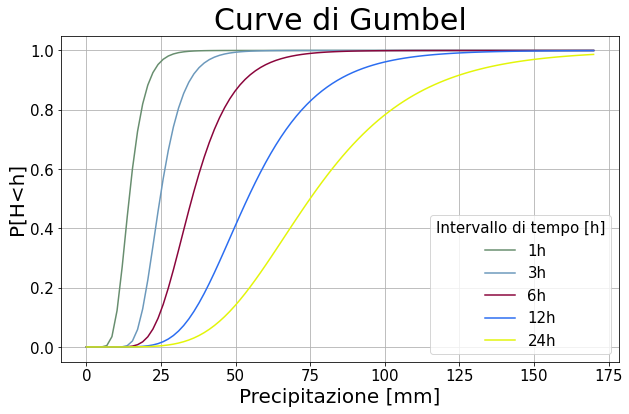

In [14]:
ax=gb.plot(color=[colors['1h'],colors['3h'],colors['6h'],colors['12h'],colors['24h']],figsize=(10,6))
ax.set_title('Curve di Gumbel')
ax.set_ylabel('P[H<h]')
ax.set_xlabel('Precipitazione [mm]')
ax.grid(True)
ax.legend (title= "Intervallo di tempo [h]")

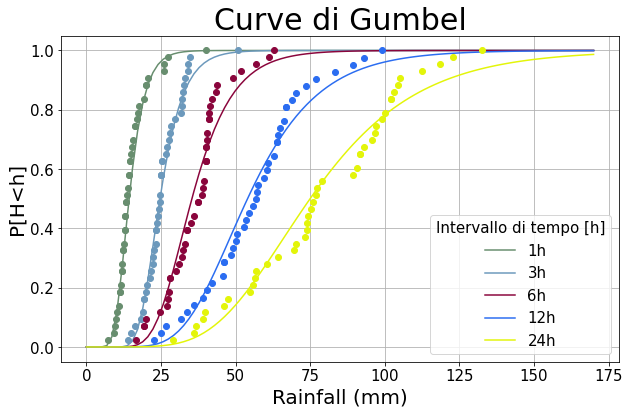

In [15]:
ax=gb.plot(color=[colors['1h'],colors['3h'],colors['6h'],colors['12h'],colors['24h']],figsize=(10,6))
ecdf={}
for i in lst:
    ecdf.update({i:ECDF(data[i].dropna())})
    ax.plot(data[i].dropna(),ecdf[i](data[i].dropna()),'o',c=colors[i])
ax.set_title('Curve di Gumbel')
ax.set_xlabel('Rainfall (mm)')
ax.set_ylabel('P[H<h]')
ax.legend (title= "Intervallo di tempo [h]")
ax.grid(True)